In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from keras import metrics

In [ ]:
# Use this cell to load data into the colab.

#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:

# Building CNN

cnn = Sequential()

# Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
#cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
METRICS = [
                'accuracy',
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')
        ]  
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = METRICS)

In [ ]:
# Fitting the CNN to the images

trainDataGenerator = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

testDataGenerator = ImageDataGenerator(rescale = 1./255)

# Reducing the image size to make it more managable
trainingData = trainDataGenerator.flow_from_directory('drive/MyDrive/xray/chest_xray/train', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

validationData = testDataGenerator.flow_from_directory('drive/MyDrive/xray/chest_xray/val/', target_size= (64, 64), batch_size= 32, class_mode ='binary')

testData = testDataGenerator.flow_from_directory('drive/MyDrive/xray/chest_xray/test', target_size = (64, 64), batch_size = 32, class_mode = 'binary')



Found 5219 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 30753     
Total params: 31,649
Trainable params: 31,649
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = cnn.fit(trainingData, steps_per_epoch = 100, epochs = 15, validation_data = validationData, validation_steps = 600)

Epoch 1/15
163/163 [==============================] - 65s 400ms/step - loss: 0.4008 - accuracy: 0.8234 - precision: 0.8303 - recall: 0.9579 - val_loss: 0.4290 - val_accuracy: 0.8125 - val_precision: 0.8571 - val_recall: 0.7500
Epoch 2/15
163/163 [==============================] - 64s 390ms/step - loss: 0.2435 - accuracy: 0.8945 - precision: 0.9176 - recall: 0.9426
Epoch 3/15
163/163 [==============================] - 64s 393ms/step - loss: 0.2262 - accuracy: 0.9061 - precision: 0.9249 - recall: 0.9506
Epoch 4/15
163/163 [==============================] - 64s 391ms/step - loss: 0.2078 - accuracy: 0.9142 - precision: 0.9329 - recall: 0.9530
Epoch 5/15
163/163 [==============================] - 65s 396ms/step - loss: 0.1951 - accuracy: 0.9240 - precision: 0.9408 - recall: 0.9579
Epoch 6/15
163/163 [==============================] - 64s 394ms/step - loss: 0.1870 - accuracy: 0.9227 - precision: 0.9387 - recall: 0.9585
Epoch 7/15
163/163 [==============================] - 65s 396ms/step - lo

KeyboardInterrupt: ignored

In [ ]:

test_accu = cnn.evaluate(testData,steps=20)

20/20 [==============================] - 6s 297ms/step - loss: 0.4560 - accuracy: 0.8317


The testing accuracy is : 83.17307829856873 %
20/20 [==============================] - 6s 304ms/step


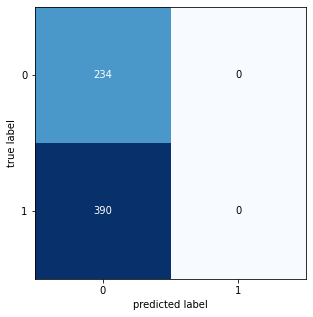

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
print('The testing accuracy is :',test_accu[1]*100, '%')
pred = cnn.predict(testData, batch_size = 32, verbose = 1)
predicted = np.argmax(pred, axis = 1)
matrix = confusion_matrix(testData.labels, predicted)
fig, ax = plot_confusion_matrix(conf_mat = matrix ,  figsize = (5, 5))
plt.show()

In [ ]:
# Examining recall, precision, and F1 score

recall = (234/(234 + 0.5*(0+390)))
print("recall: ", recall)

precision = (234/(234))
print("precision: ", precision)

F1 = 2 * (precision * recall)/(precision + recall)
print("F1: ", F1)

recall:  0.5454545454545454
precision:  1.0
F1:  0.7058823529411764
